In [1]:
cd D:\Phishing Url Detection


D:\Phishing Url Detection


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing dataset. (Dataset used from Kaggle). Dataset consists of more than 11000+ websites urls, having 30 websites parameters and class label identifying it as Phishing or not(1 or -1).

In [3]:
data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [4]:
data.shape

(11054, 32)

In [6]:
# features of dataset
data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [7]:
# information regarding dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [8]:
# unique values in column
data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [12]:
#droping index values
data = data.drop(['Index'], axis = 1)

In [13]:
#data description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


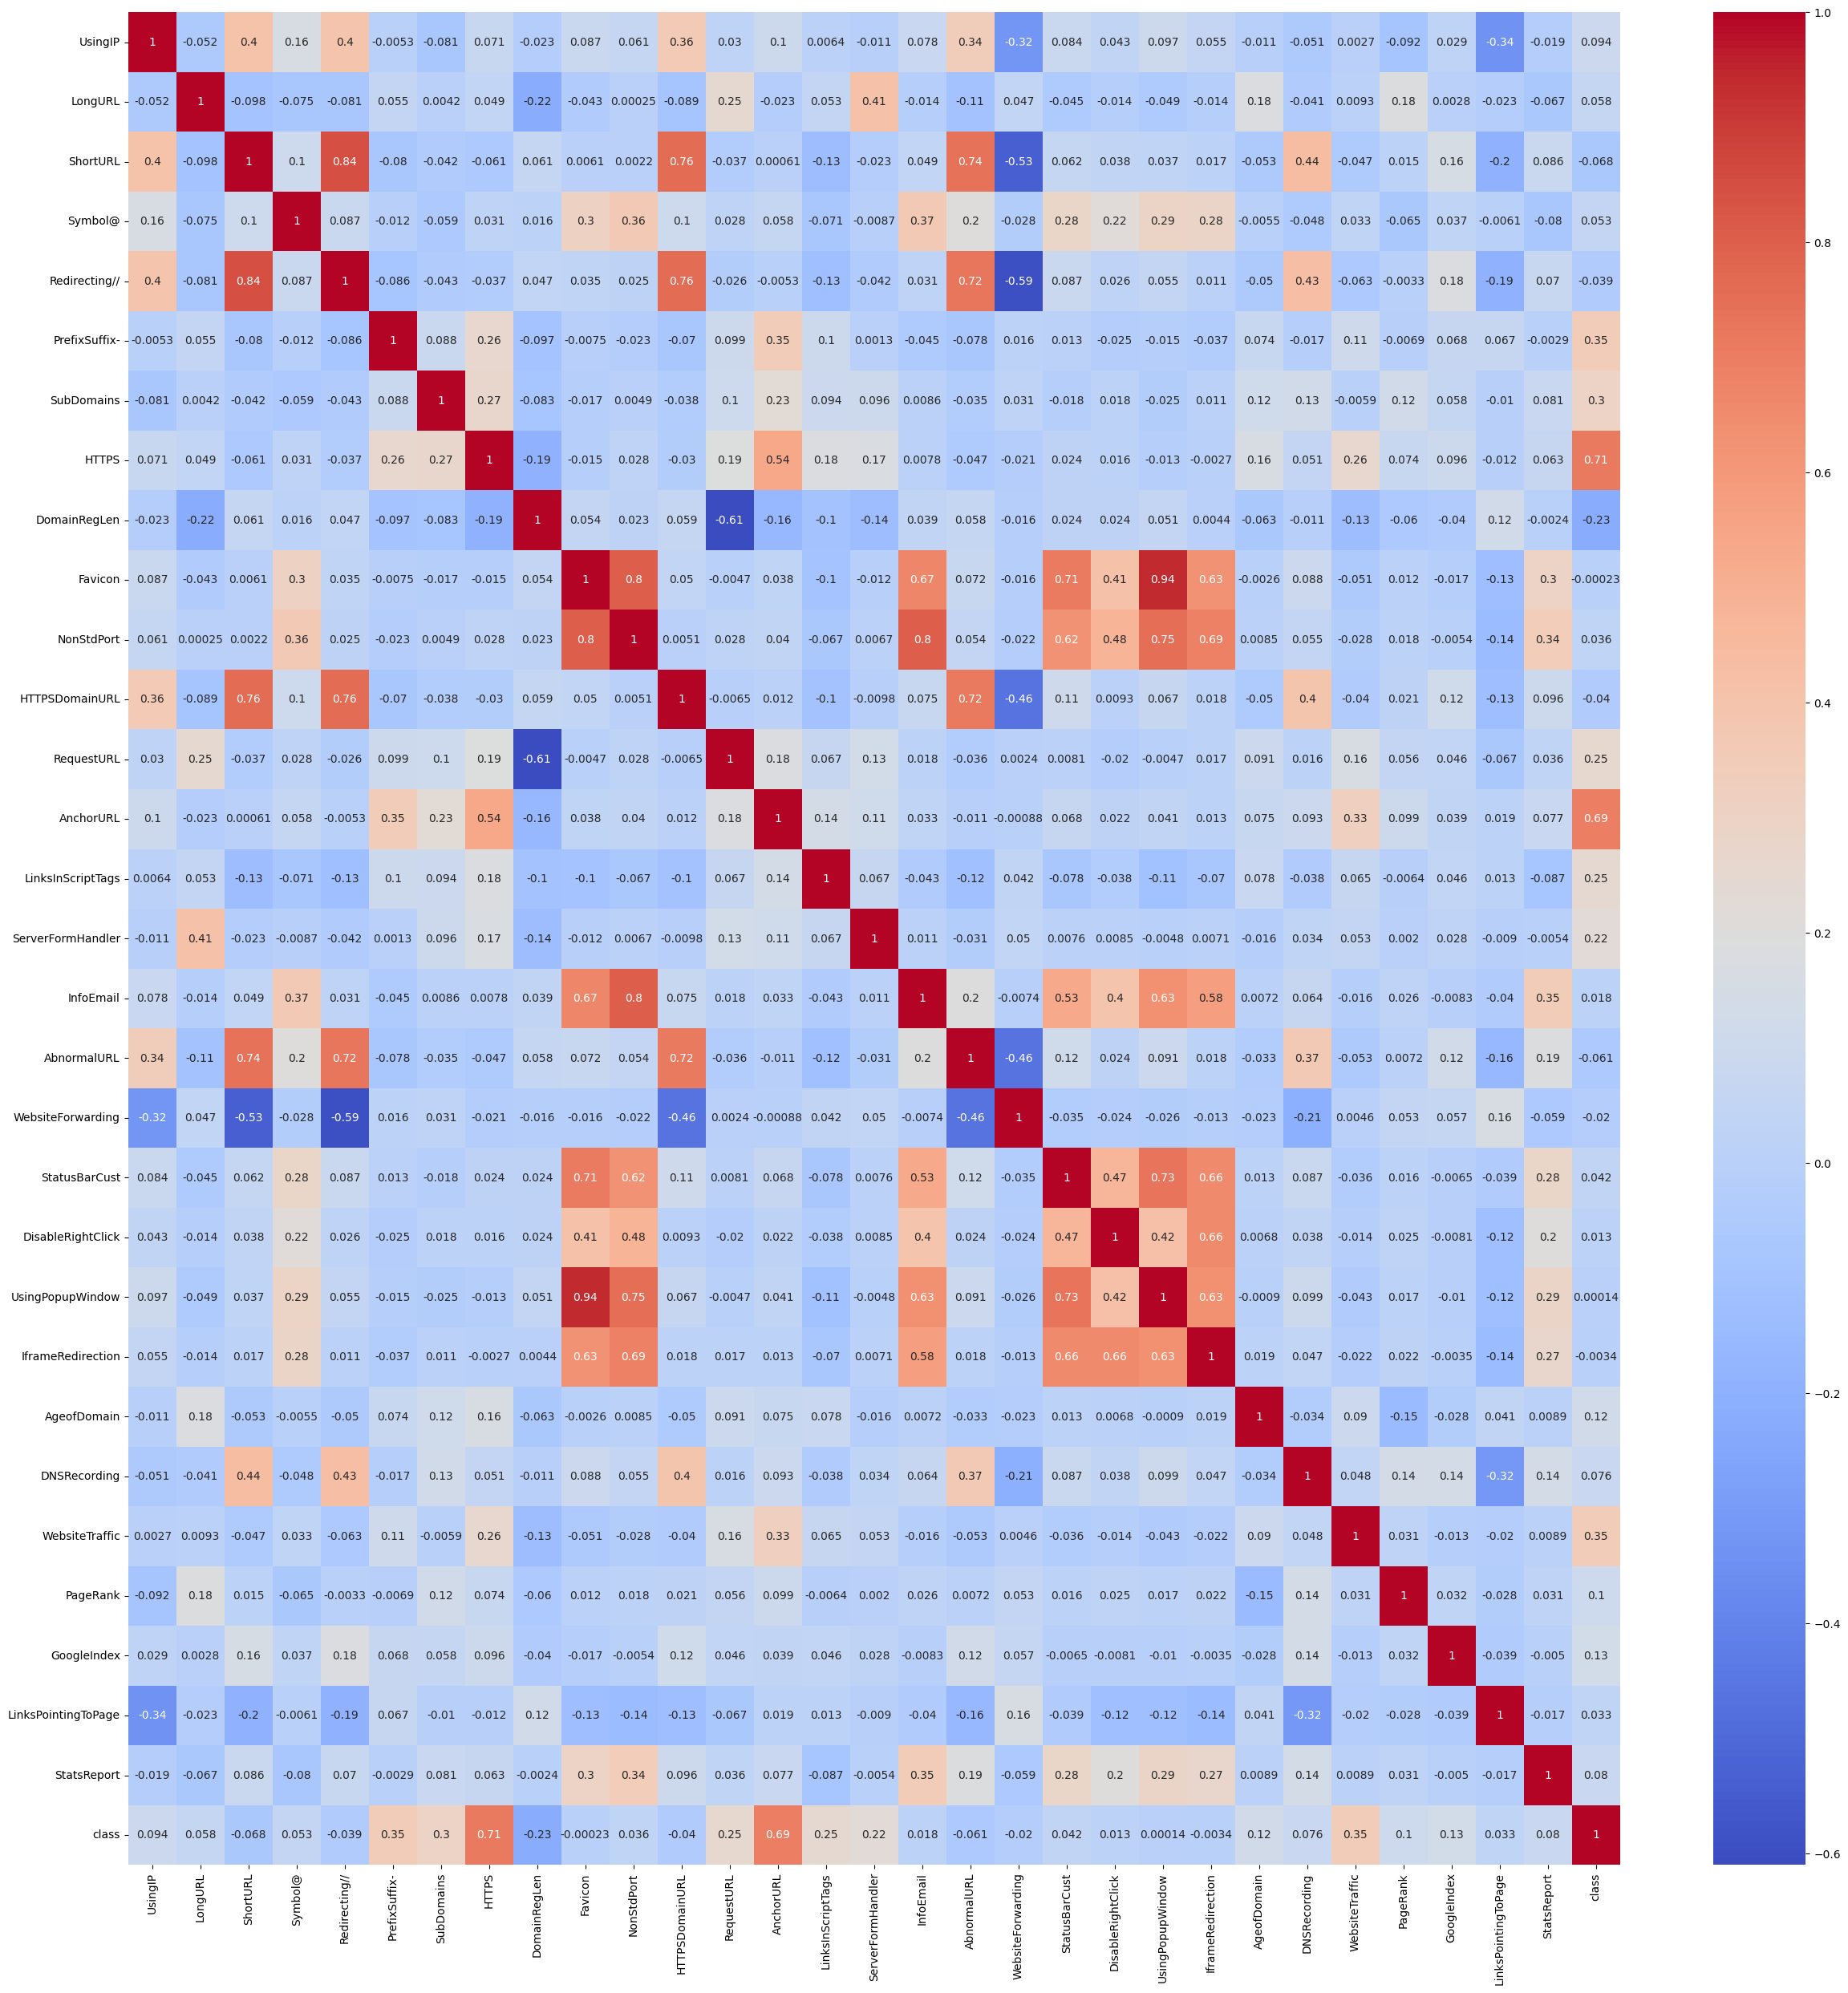

In [16]:
#Correlation heatmap

plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True,cmap='coolwarm')
plt.show()

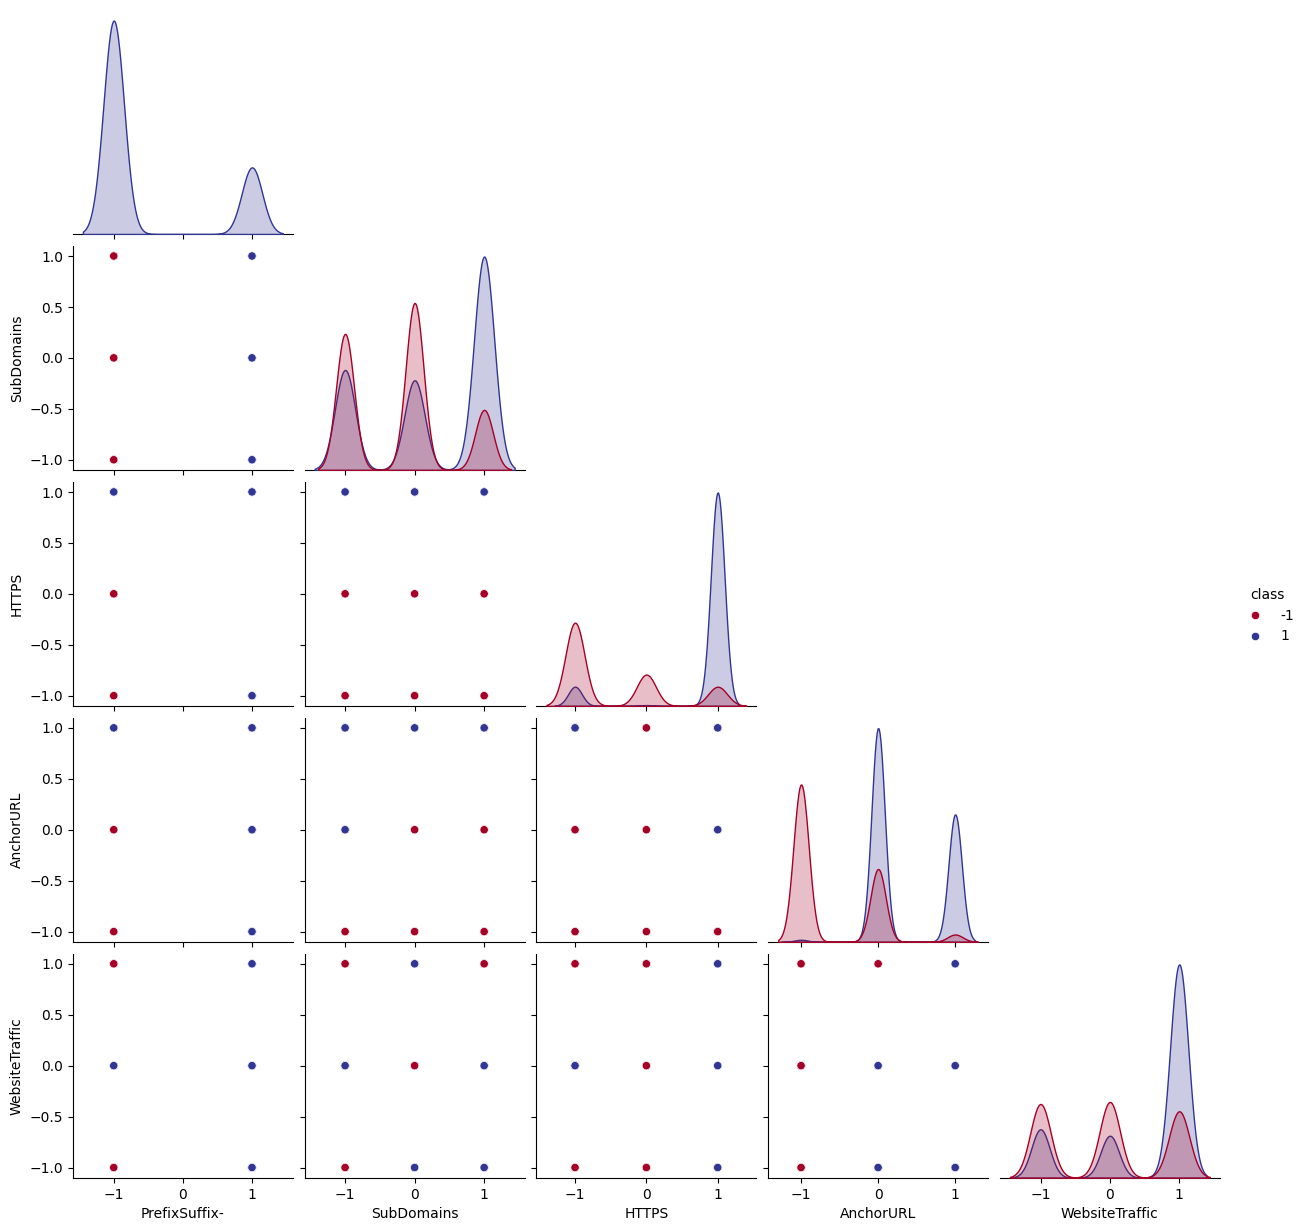

In [18]:
#pairplot for particular features

df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
sns.pairplot(data = df,hue="class",corner=True,palette="RdYlBu");

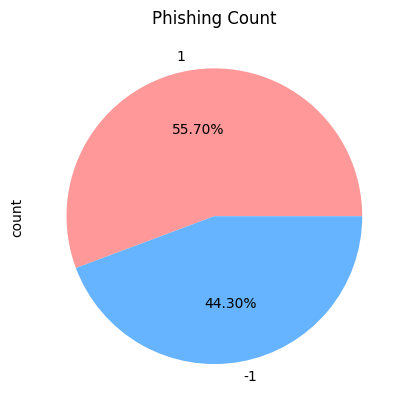

In [19]:
# Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%',colors=['#ff9999','#66b3ff'])
plt.title("Phishing Count")
plt.show()

In [20]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["class"],axis =1)
y = data["class"]

In [21]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

In [ ]:
Model Building and training

In [22]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

In [23]:
#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

In [ ]:
K-Nearest Neighbors : Classifier
K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [24]:
#K-NN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
#predicting the target value from the model
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [29]:
#computing the accuracy,f1_score,Recall,precision of the model performance

accuracy_train_knn = metrics.accuracy_score(y_train,y_train_knn)
accuracy_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-NN : accuracy on training Data: {:.3f}".format(accuracy_train_knn))
print("K-NN : accuracy on test Data: {:.3f}".format(accuracy_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-NN : F1 score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-NN : F1 score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-NN : recall score on training Data: {:.3f}".format(recall_score_train_knn))
print("K-NN : recall score on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-NN : precision score on training Data: {:.3f}".format(precision_score_train_knn))
print("K-NN : precision score on test Data: {:.3f}".format(precision_score_test_knn))
print()

K-NN : accuracy on training Data: 0.988
K-NN : accuracy on test Data: 0.959

K-NN : F1 score on training Data: 0.990
K-NN : F1 score on test Data: 0.963

K-NN : recall score on training Data: 0.988
K-NN : recall score on test Data: 0.964

K-NN : precision score on training Data: 0.991
K-NN : precision score on test Data: 0.963



In [31]:
#classification report
print(metrics.classification_report(y_test,y_test_knn))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



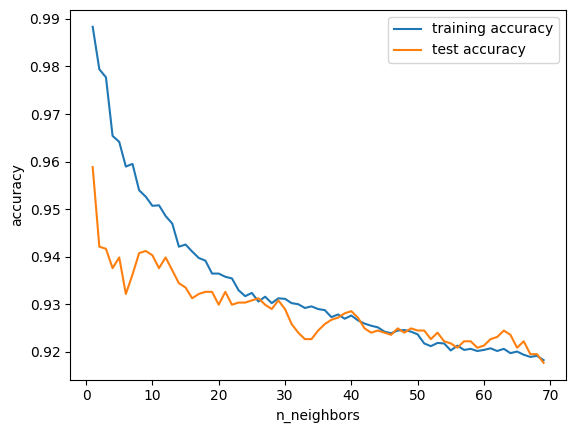

In [33]:
training_accuracy = []
test_accuracy = []
depth = range(1,70)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))

#plotting the training and testing accuracy for n_estimators from 1 to 70
plt.plot(depth,training_accuracy, label='training accuracy')
plt.plot(depth,test_accuracy, label='test accuracy')
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [35]:
#storing results
storeResults('K-Nearest Neighbors',accuracy_test_knn,f1_score_test_knn,recall_score_train_knn,precision_score_train_knn)

In [ ]:
Naive Bayes : Classifier
Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text, image classification that includes a high-dimensional training dataset. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

In [37]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [38]:
#predecting
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [39]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.605
Naive Bayes Classifier : Accuracy on test Data: 0.605

Naive Bayes Classifier : f1_score on training Data: 0.451
Naive Bayes Classifier : f1_score on test Data: 0.454

Naive Bayes Classifier : Recall on training Data: 0.292
Naive Bayes Classifier : Recall on test Data: 0.294

Naive Bayes Classifier : precision on training Data: 0.997
Naive Bayes Classifier : precision on test Data: 0.995


In [41]:
print(metrics.classification_report(y_test, y_test_nb))

              precision    recall  f1-score   support

          -1       0.53      1.00      0.69       976
           1       0.99      0.29      0.45      1235

    accuracy                           0.60      2211
   macro avg       0.76      0.65      0.57      2211
weighted avg       0.79      0.60      0.56      2211



In [42]:
#storing results
storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,recall_score_train_nb,precision_score_train_nb)

In [ ]:
Decision Trees : Classifier
Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=30)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [44]:
y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [45]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.991
Decision Tree : Accuracy on test Data: 0.957

Decision Tree : f1_score on training Data: 0.992
Decision Tree : f1_score on test Data: 0.962

Decision Tree : Recall on training Data: 0.991
Decision Tree : Recall on test Data: 0.959

Decision Tree : precision on training Data: 0.993
Decision Tree : precision on test Data: 0.965


In [46]:
print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.95      0.96      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



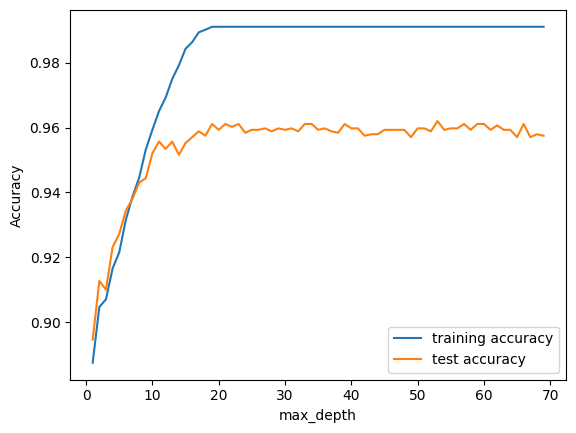

In [47]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 70
depth = range(1,70)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    training_accuracy.append(tree_test.score(X_train, y_train))
    test_accuracy.append(tree_test.score(X_test, y_test))
    
#plotting the training & testing accuracy for max_depth from 1 to 70
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [48]:
#storing results
storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,recall_score_train_tree,precision_score_train_tree)

In [ ]:
Random Forest : Classifier
Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [49]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [50]:
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [51]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.990
Random Forest : Accuracy on test Data: 0.971

Random Forest : f1_score on training Data: 0.991
Random Forest : f1_score on test Data: 0.974

Random Forest : Recall on training Data: 0.993
Random Forest : Recall on test Data: 0.977

Random Forest : precision on training Data: 0.989
Random Forest : precision on test Data: 0.965


In [52]:
print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.97       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



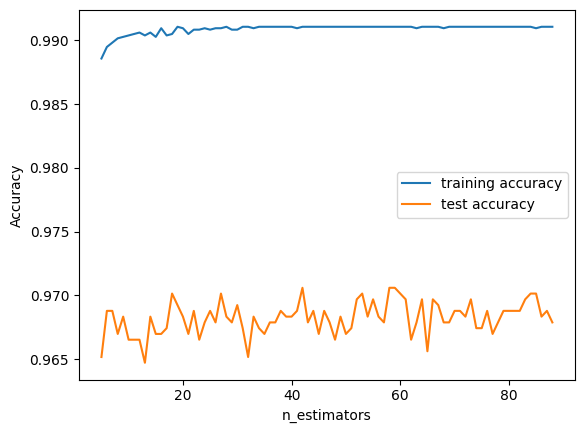

In [53]:
training_accuracy = []
test_accuracy = []
# try max_depth from 5 to 89
depth = range(5,89)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    training_accuracy.append(forest_test.score(X_train, y_train))
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 5 to 89
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [54]:
#storing results
storeResults('Random Forest',acc_test_forest,f1_score_test_forest,recall_score_train_forest,precision_score_train_forest)

In [ ]:
Comparing Models

In [55]:
#creating Dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,'Accuracy' : accuracy,'f1_score' : f1_score,'Recall'   : recall,'Precision': precision,})

In [56]:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,K-Nearest Neighbors,0.959,0.963,0.988,0.991
1,Naive Bayes Classifier,0.605,0.454,0.292,0.997
2,Decision Tree,0.957,0.962,0.991,0.993
3,Random Forest,0.971,0.974,0.993,0.989


In [57]:
#sorting
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [58]:
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest,0.971,0.974,0.993,0.989
1,K-Nearest Neighbors,0.959,0.963,0.988,0.991
2,Decision Tree,0.957,0.962,0.991,0.993
3,Naive Bayes Classifier,0.605,0.454,0.292,0.997


In [ ]:
Storing best Model

In [60]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Define the model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Save the model
joblib.dump(random_forest_model, 'random_model.pkl')
print("Random Forest model saved as the best model.")

Random Forest model saved as the best model.


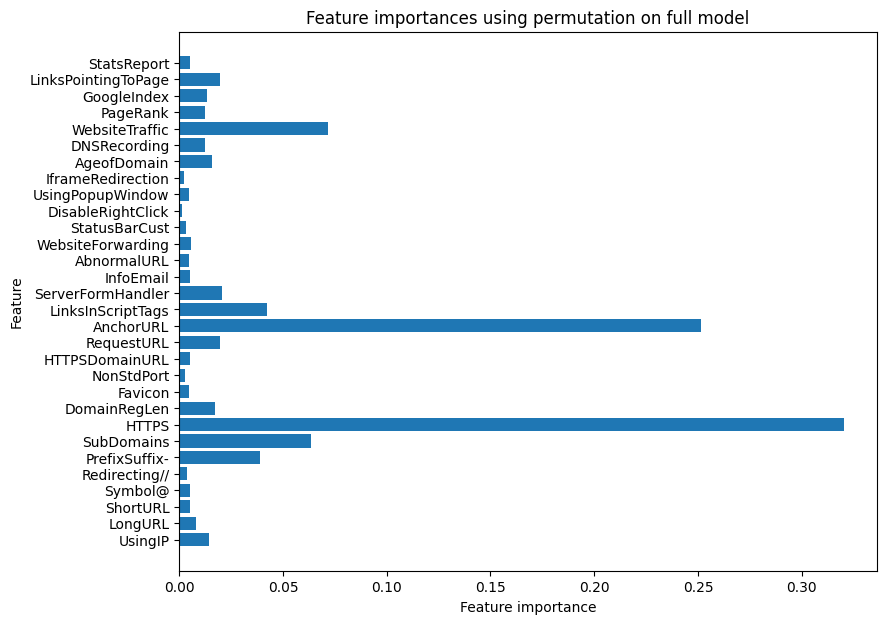

In [62]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), random_forest_model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()